#Bird Tracking
##Milestone Project 2


**Instructions**

For the second milestone project, you will be creating a dashboard that displays information about bird migration routes. 

This project will be split into three 
parts:

> **Part 1:** SQL and Databases

> **Part 2:** Data Wrangling

> **Part 3:** Visualizations

**Required Tools:** Google Colab, MySQL Workbench, Miro










**Background**

*Wings 4 Life* is a bird refuge organization that helps bird watchers plan bird-watching trips along migration routes on the southwestern coast of Europe and northwestern coast of Africa. 

It provides three different travel packages for tourists to choose from based on the locations they wish to visit and the types of birds they would like to see.

You will build a map of the best bird-watching sites for the three different traveler profiles listed below. The steps for Parts 1 and 2 are the same for all traveler profiles.

**The French Traveler**
* Only visits locations within or very near France
* Prefers high-speed bird sightings
* Hates cold weather

**The Retirement Getaway**
* Prefers to travel in the spring months
* Prefers birds that fly at low altitudes
* Willing to visit any location with mild weather (60s–70s)

**The Loner**
* Prefers the early morning 
* Likes cool weather
* Looking for higher-altitude bird flights 

# **Part 1: SQL and Databases**

We will use MySQL Workbench to create the final data set for the dashboard.

The two data sets we will work with are:

>***city_weather.sql***

>***bird_data.sql*** 

The first data set contains the average daily temperature of the major cities the birds pass during their migration route. The second data set contains information about the birds.


**Step 1: Open MySQL Workbench**

Open a new instance of MySQL Workbench on your computer. We need to create a new schema for this project. In a new query tab, run the following code:



```
CREATE SCHEMA milestone_project2
```



Remember, to see your new schema in the schema navigator, you will need to refresh the navigator.  **Make sure to highlight the name of the new schema so the new tables will be created in it.**

**Step 2: Create Tables**

The scripts to build the tables have already been created. To upload the script, navigate to **File >** ***Open SQL script*** 

Run `city_weather.sql` and `bird_data.sql`


**Step 3: View Tables**

Write a query that returns the first five rows of the ***city_weather*** table. Copy your query below.

**Step 3 Answer:**  
Select * from city_weather limit 5;



**Step 4: View Tables**

Write a query that returns the first five rows of the ***bird_data*** table. Copy your query below.

**Step 4 Answer:**
Select * from bird_data limit 5;



**Step 5: Joining Tables**

We need to join the ***bird_data*** and ***city_weather*** tables to create a table with the following columns.

* id 
* altitude 
* date_time 
* device_info 
* direction 
* latitude 
* longitude 
* speed_2d
* bird_name
* nearest_city 
* country 
* avg_temp 

Look closely at the first five observations of each table. Which **two** features will we need to merge to join the two tables? 



**Step 5 Answer:**
--SELECT b.id, b.altitude, b.date_time, b.device_info_serial, b.direction, b.latitude, b.longitude, b.speed_2d, b.bird_name, b.nearest_city, b.country, c.avg_temp
FROM bird_data b
left outer join city_weather c on b.nearest_city = c.city and b.date = c.date;
 





**Step 6: Joining Tables Continued**

What are the names of the columns in the ***bird_data*** table that can be used for the join?  What are the corresponding column names in ***city_weather***?

**Step 6 Answer:*
--bird_data = nearest_city, date

city_weather = city, date


**Step 7: Joining Tables Continued**

We want to merge ***bird_data*** on the left and ***city_weather*** on the right so  every element of ***bird_data*** is included in the results regardless of whether it appears in ***city_weather***.  What type of join is this?

**Step 7 Answer:**

--The right Outer Join


SELECT b.id, b.altitude, b.date_time, b.device_info_serial, b.direction, b.latitude, b.longitude, b.speed_2d, b.bird_name, b.nearest_city, b.country, c.avg_temp
FROM city_weather c
right outer join bird_data b on b.nearest_city = c.city and b.date = c.date;













**Step 8:**


Click ***Query*** in the MySQL Workbench menu.  Select ***Limit Rows*** and then ***Don't Limit***.

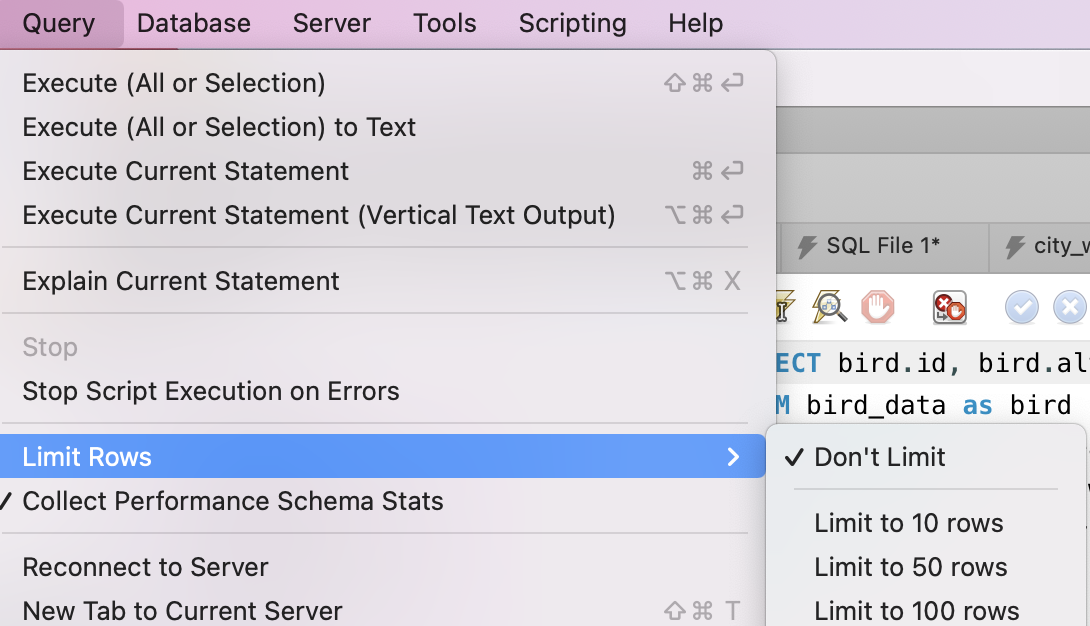

*From: ThriveDX*

**Step 9: Joining Tables Continued**

Join the two tables, with ***bird_data*** aliased as *bird*, and ***city_weather*** aliased as *city*.

Select only the following columns:

* id 
* altitude 
* date_time 
* device_info 
* direction 
* latitude 
* longitude 
* speed_2d
* bird_name
* nearest_city 
* country 
* avg_temp 

Order the results by *id*.

Copy your query below.



**Step 9 Answer:**


-- SELECT id, altitude, date_time, device_info_serial, direction, latitude, longitude, speed_2d, bird_name, nearest_city, country, avg_temp
FROM bird_data as bird
left outer join city_weather as city on nearest_city = city and bird.date = city.date
order by id




**Step 10: Export the Table**

In the top center of the query results, click the **Export** button.

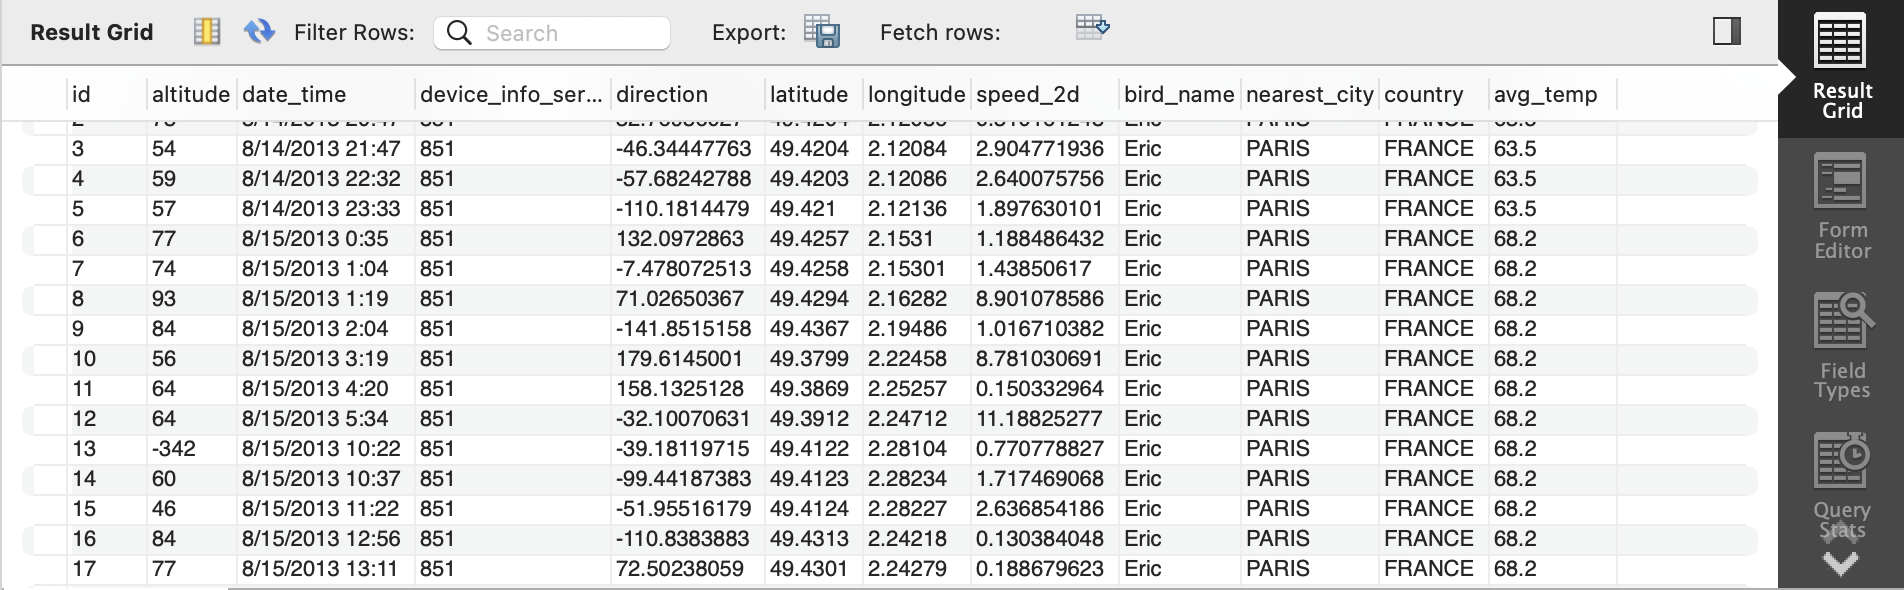

*From: ThriveDX*



**Step 11: Export the Table Continued**

Save the exported table as a .csv file named ***bird_tracking.csv***.  Save it to your computer in a location that's easy to find.

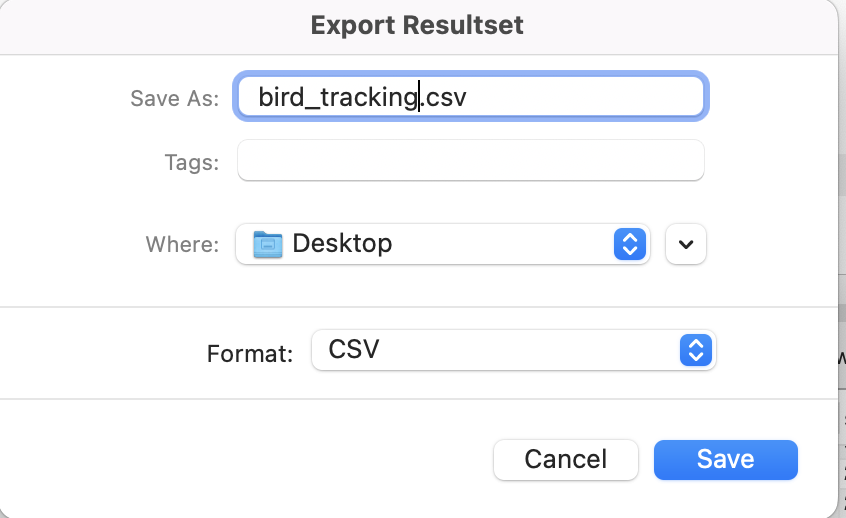

*From: ThriveDX*

# **Part 2: Data Wrangling**

You will continue working through the bird migration data set through various regions around the world. In this section of the milestone project, you will be required to exercise your data wrangling skills in Python. 

Complete each step to prepare for the visualization portion in Part 3. 

Upload the ***bird_tracking.csv*** file you exported in Part 1 to your Google Colab files so you can use it in Part 2 of the project.

**Step 1: Import the Necessary Libraries for This Project**

You will need to import the following libraries for this portion of the milestone project:          
* Pandas
* Numpy

In [1]:
#Step 1 Answer:
import pandas as pd
import numpy as np

**Step 2: Read in the Data Set to a Dataframe**

Now that you have completed the first portion of the milestone project in SQL, read in your updated data set (***bird_tracking.csv***) into a dataframe below. Name the dataframe *birds_df*.  Print the dataframe to ensure the data was read in correctly.

In [3]:
#Step 2 Answer:
birds_df= pd.read_csv('bird_tracking.csv')


**Step 3: Detect Missing Data (If Any)**

As you know, we cannot complete an accurate analysis with missing or incorrect data. Let's take care of those issues now by working to determine if there are any errors within our data set. You might have noticed some of these errors while working in the SQL portion of this project. 

Use the `isnull().sum()` function to get the number of missing cells in each column.

Drop any records with missing data using `.dropna(inplace=True)`

In [4]:
#Step 3 Answer:
birds_df.isnull().sum()
birds_df.dropna(inplace=True)
birds_df.head()

,id,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name,nearest_city,country,avg_temp
0,1,71,8/14/2013 19:18,851,-150.469753,49.4199,2.12073,0.150000,Eric,PARIS,FRANCE,63.5
1,2,73,8/14/2013 20:47,851,32.769360,49.4204,2.12086,0.310161,Eric,PARIS,FRANCE,63.5
2,3,54,8/14/2013 21:47,851,-46.344478,49.4204,2.12084,2.904772,Eric,PARIS,FRANCE,63.5
3,4,59,8/14/2013 22:32,851,-57.682428,49.4203,2.12086,2.640076,Eric,PARIS,FRANCE,63.5
4,5,57,8/14/2013 23:33,851,-110.181448,49.4210,2.12136,1.897630,Eric,PARIS,FRANCE,63.5


**Step 4: Duplicates**

Check for duplicated rows using `.duplicated().sum()` and drop any that are missing using `.drop_duplicates()`

In [5]:
#Step 4 Answer:
birds_df.duplicated().sum()




0

**Step 5: Perform Basic Exploratory Data Analysis**

You should already be familiar with the ***bird_tracking.csv*** data set from Part 1 of the milestone project. Perform basic EDA using:
* `.dtypes()`
* `.describe()`

In [6]:
#Step 5 Answer:
birds_df.dtypes
birds_df.describe()

,id,altitude,device_info_serial,direction,latitude,longitude,speed_2d,avg_temp
count,9930.000000,9930.000000,9930.000000,9930.000000,9930.000000,9930.000000,9930.000000,9930.000000
mean,4997.300403,51.344713,849.398590,-6.298123,30.428889,-8.829069,2.527014,64.125237
std,2889.078150,131.862844,12.787991,102.741537,14.841404,8.511616,3.571868,16.380509
min,1.000000,-668.000000,833.000000,-179.985721,12.358400,-17.624600,0.000000,-99.000000
25%,2497.250000,3.000000,833.000000,-91.342204,15.549475,-16.758075,0.402150,55.700000
50%,4990.500000,14.000000,851.000000,-12.185866,30.428600,-9.652620,1.192434,65.500000
75%,7491.750000,87.000000,864.000000,80.327169,50.034450,2.619160,2.994178,71.700000
max,9999.000000,5448.000000,864.000000,180.000000,51.514300,4.853160,63.488066,92.800000


**Step 6:** **Looking for Outliers**

Look at the minimum and maximum vales in the ```describe()``` output. Do any of them seem unreasonable for a migrating bird?

Use the code below for *avg_temp*. Then plot *altitude* and *speed_2d* on your own.

In [7]:
# Step 6a:
import plotly.express as px
df = birds_df
fig = px.histogram(df, x="avg_temp")
fig.show()

In [8]:
# Step 6b:
df = birds_df
fig = px.histogram(df, x="altitude")
fig.show()

In [9]:
# Step 6c:
df = birds_df
fig = px.histogram(df, x="speed_2d")
fig.show()

From the plots, we can see the temperature minimum is truly an outlier. Drop that row using *avg_temp* > 40.

In [10]:
# Step 6d:
#df = df[df['Team'] != 'C']
birds_df = birds_df[birds_df['avg_temp'] > 40]

In [11]:
birds_df.head()

,id,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name,nearest_city,country,avg_temp
0,1,71,8/14/2013 19:18,851,-150.469753,49.4199,2.12073,0.150000,Eric,PARIS,FRANCE,63.5
1,2,73,8/14/2013 20:47,851,32.769360,49.4204,2.12086,0.310161,Eric,PARIS,FRANCE,63.5
2,3,54,8/14/2013 21:47,851,-46.344478,49.4204,2.12084,2.904772,Eric,PARIS,FRANCE,63.5
3,4,59,8/14/2013 22:32,851,-57.682428,49.4203,2.12086,2.640076,Eric,PARIS,FRANCE,63.5
4,5,57,8/14/2013 23:33,851,-110.181448,49.4210,2.12136,1.897630,Eric,PARIS,FRANCE,63.5


It seems unusual for altitude to have a negative value. Using Plotly Express, you can hover over the values and see a count for each bin. It looks like at least 15% of the data is less than zero. 

The data comes from a barometric sensor. Given the proportion of data less than zero, this is most likely valid.

The *speed_2d* data distribution looks reasonable.

**Step 7: EDA for Categorical Features**

Note that `.describe()` doesn't give basic descriptive statistics for categorical features by default.  Use `.value_counts()` to find the frequency of each *bird_name* and *nearest_city*.

Most observations in the data set were nearest to which city?



In [12]:
# Step 7 Answer:
print(birds_df[['bird_name']].value_counts())
birds_df[['nearest_city']].value_counts()

bird_name
Nico         3355
Sanne        3313
Eric         3203
dtype: int64


nearest_city
DAKAR           2917
RABAT           2003
PARIS           1554
BRUSSELS        1461
NOUAKCHOTT      1274
BISSAU           247
LISBON           182
BANJUL           108
BILBAO            66
BORDEAUX          59
dtype: int64

**Step 7 Answer:**




**Step 8: Average Temperature**

Three types of potential tourists were identified at the beginning of the project.  All of them had concerns about the weather being too hot or too cold.

Find the average temperature for each country in the data set.

*Hint: Follow these next steps to find the average temperature for each country.*
* Create a new dataframe with the columns *country* and *avg_temp*.
* Use the `.groupby()` function for the country.
* Add the aggregate function `.mean()` to the end of your  `.groupby()` statement to calculate the average temperature.

Which country has the warmest average temperature?  Which country has the coolest average temperature?

In [13]:
#Step 8 Answer:
new_df = birds_df[['country','avg_temp']]
new_df.head()

,country,avg_temp
0,FRANCE,63.5
1,FRANCE,63.5
2,FRANCE,63.5
3,FRANCE,63.5
4,FRANCE,63.5


In [14]:
new_df.groupby('country').mean().sort_values(['avg_temp'],ascending=True)

,avg_temp
country,
MOROCCO,56.151972
BELGIUM,56.395277
SPAIN,58.148485
FRANCE,59.940112
PORTUGAL,65.350000
SENEGAL,72.529208
MAURITANIA,74.682653
GAMBIA,76.791667
GUINEA-BISSAU,82.254656


**Step 8 Answer:**



**Step 9: Drop, Rename, and Replace**

Moving forward for our analysis, there are a few columns we don't need as well as columns that will need to be more specific. 

* Drop the *id*, *device_info_serial*, *direction*, and *nearest_city* columns. 
* Rename *speed_2d* to *speed*.

Print the dataframe to confirm your changes were successful.  If your changes don't persist, make sure you are using `inplace=True`

In [15]:
#Step 9:
birds_df.drop(['id', 'device_info_serial', 'direction', 'nearest_city'], axis = 1, inplace=True)
birds_df['speed'] = birds_df['speed_2d']
birds_df.head()

<ipython-input-15-e513cb8284c2>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-15-e513cb8284c2>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,altitude,date_time,latitude,longitude,speed_2d,bird_name,country,avg_temp,speed
0,71,8/14/2013 19:18,49.4199,2.12073,0.150000,Eric,FRANCE,63.5,0.150000
1,73,8/14/2013 20:47,49.4204,2.12086,0.310161,Eric,FRANCE,63.5,0.310161
2,54,8/14/2013 21:47,49.4204,2.12084,2.904772,Eric,FRANCE,63.5,2.904772
3,59,8/14/2013 22:32,49.4203,2.12086,2.640076,Eric,FRANCE,63.5,2.640076
4,57,8/14/2013 23:33,49.4210,2.12136,1.897630,Eric,FRANCE,63.5,1.897630


**Step 10: Data Export**

Congratulations! You have reached the end of Part 2 of the milestone project. Next, you will use this data set to create visualizations for a variety of users.

Let's export our dataframe to a new .xlsx file that we can use in the final part of the milestone project.  Run the following code block to export the data:

In [16]:
#Step 9

birds_df.to_excel('bird_data_clean.xlsx')

You should be able to download the ***bird_data_clean.xlsx*** file from the Google Colab files.

# **Part 3: Visual Communications**

In Part 3 of the project, you will work with maps generated using Tableau Public to create three separate Miro dashboards for three different traveler profiles.  For reference, the three traveler profiles and requirements are as follows:

**The French Traveler**
* Only visits locations within France
* Prefers high-speed bird sightings
* Hates cold weather

**The Retirement Getaway**
* Prefers to travel in the spring months
* Prefers birds that fly at low altitudes
* Willing to visit any location with mild weather (60s–70s)

**The Loner**
* Prefers the early morning 
* Likes cool weather
* Looking for higher-altitude bird flights 





Just like in the final project for DSA07 Data Visualization, you'll assemble three data visualizations using Miro.  You may wish to start with a copy of the Miro board from that project and adapt it for this part of Milestone 2.

You will make one Miro board for each traveler profile.  Think about how you would "sell" each set of bird watching stops to each type of customer.

You may use the maps and descriptions found below or generate your own visulizations using Python.  Add text, graphics and annotations to highlight why these are the right bird watching stops for each customer.

#**The French traveler profile:**


* Only visits locations within or very near France (between 42.20 N and 51.05 N and between of 2.2137 E and 4.47 W)
* Prefers high-speed bird sightings (greater than 15 mph)
* Hates cold weather (desires an average temperature warmer than 50 degrees F)


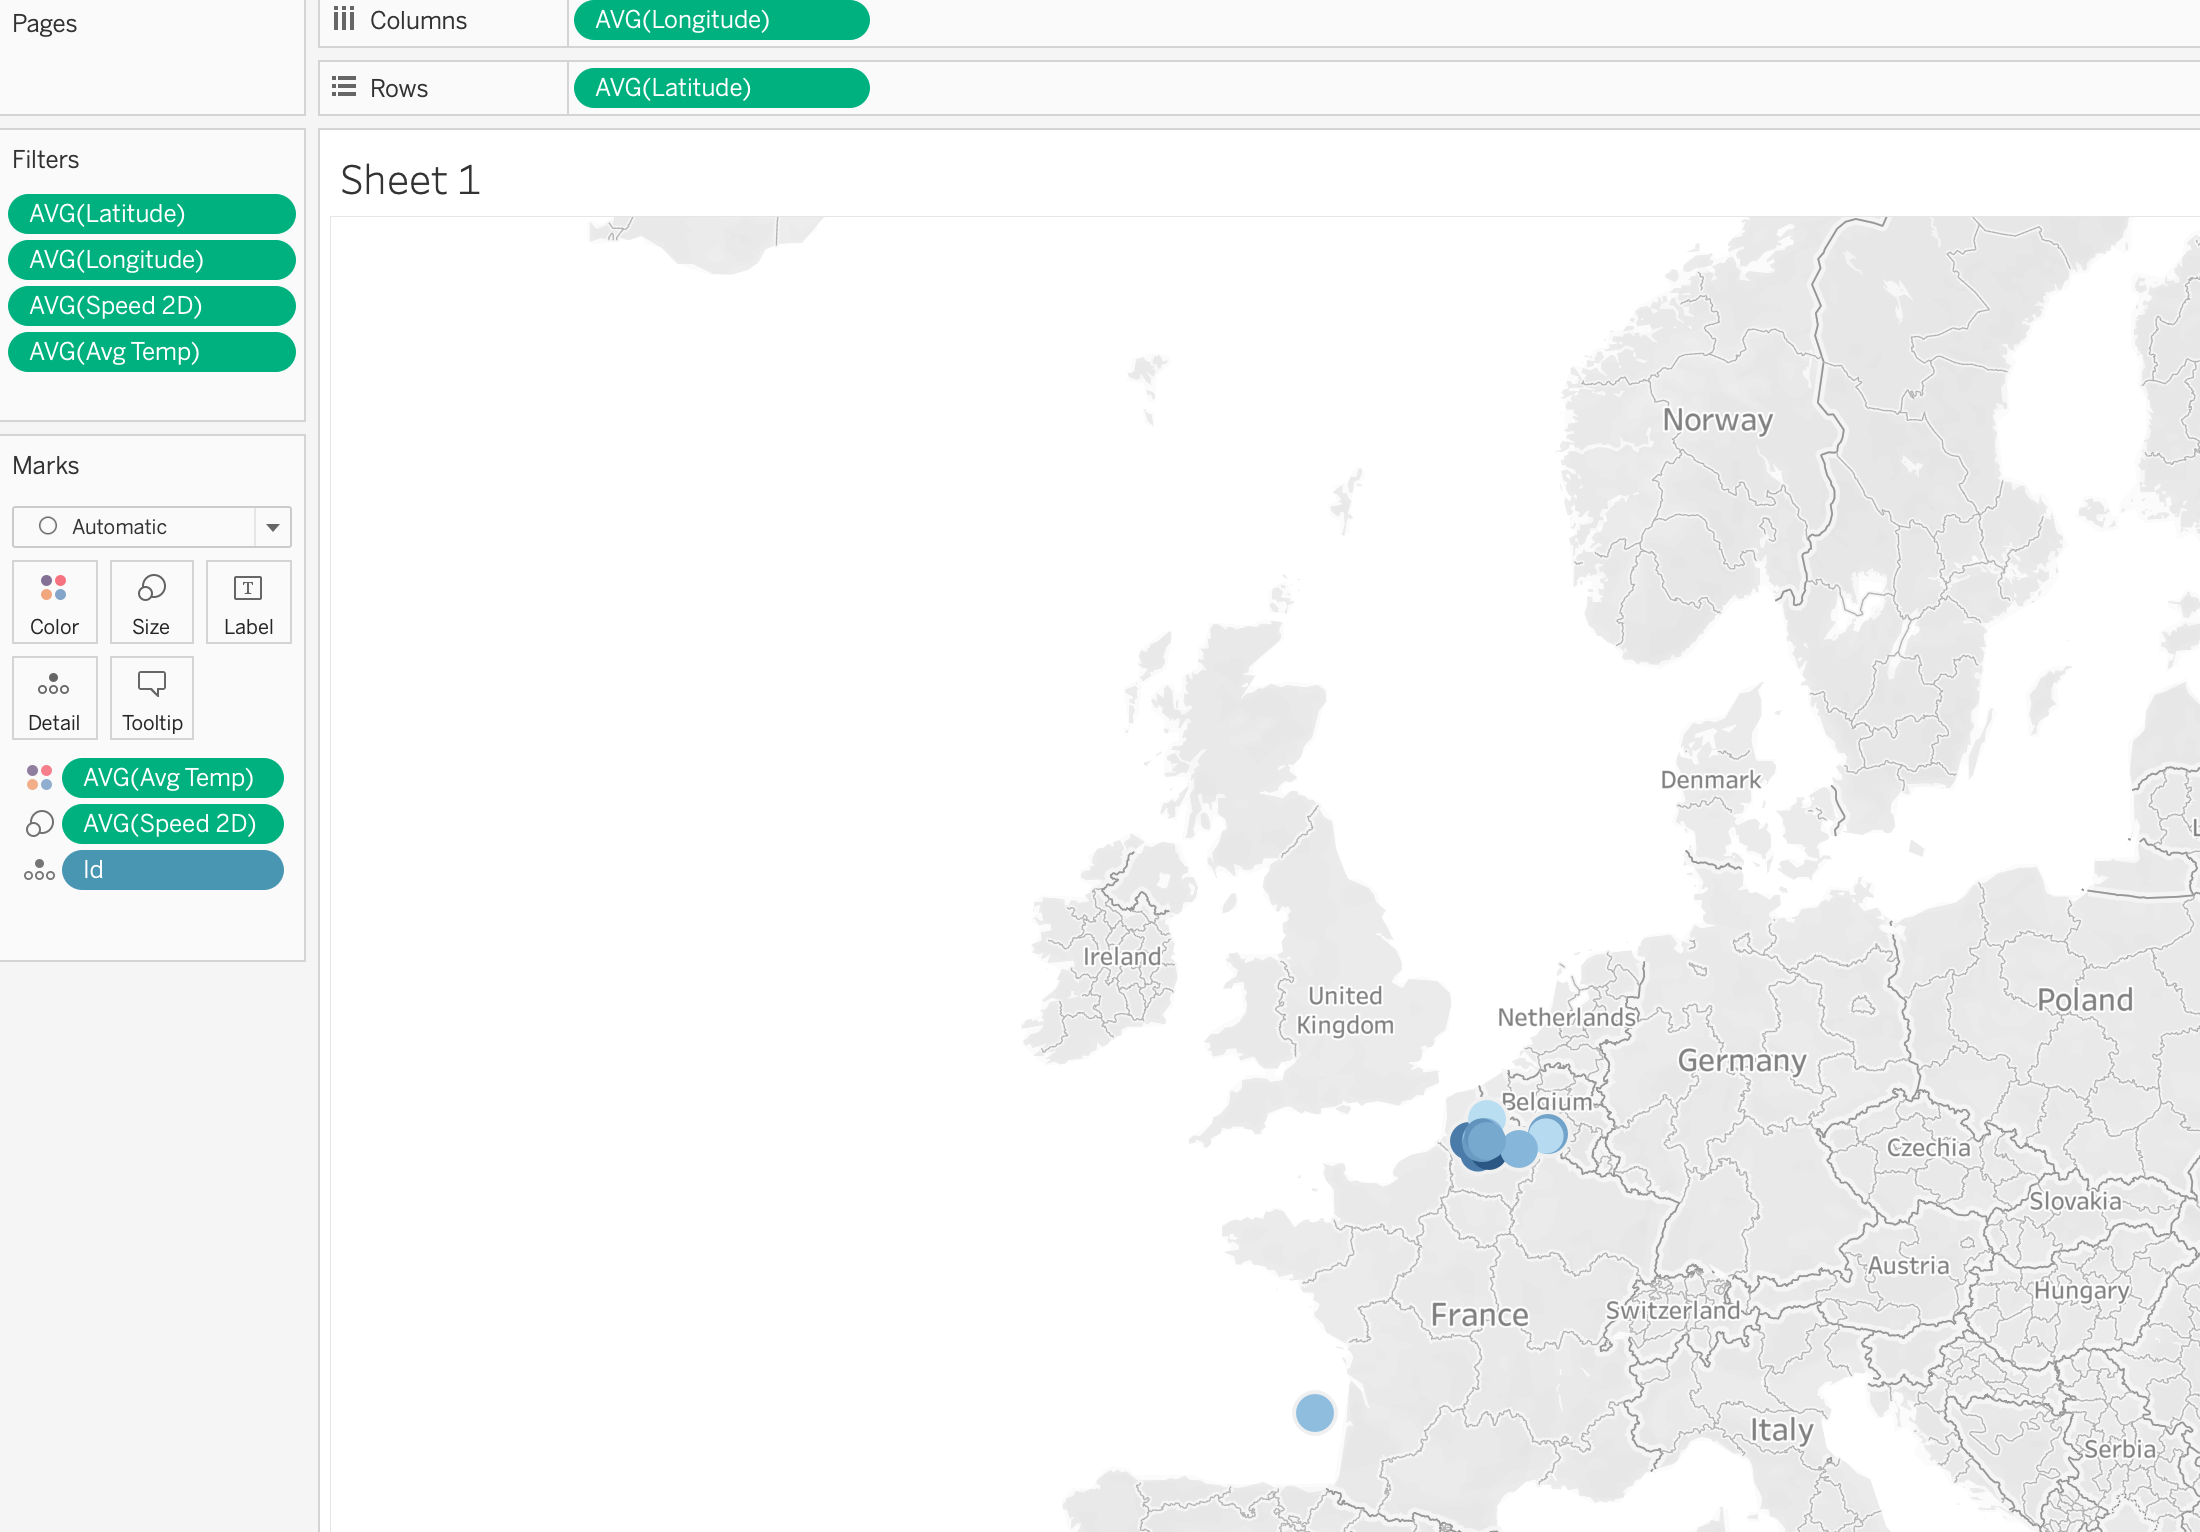

**Paste link to Miro board here:**

#**The Retirement Getaway profile**


* Prefers to travel in the spring months (March, April or May)
* Prefers birds that fly at low altitudes (0 - 300 ft)
* Willing to visit any location with mild weather (60s–70s F)


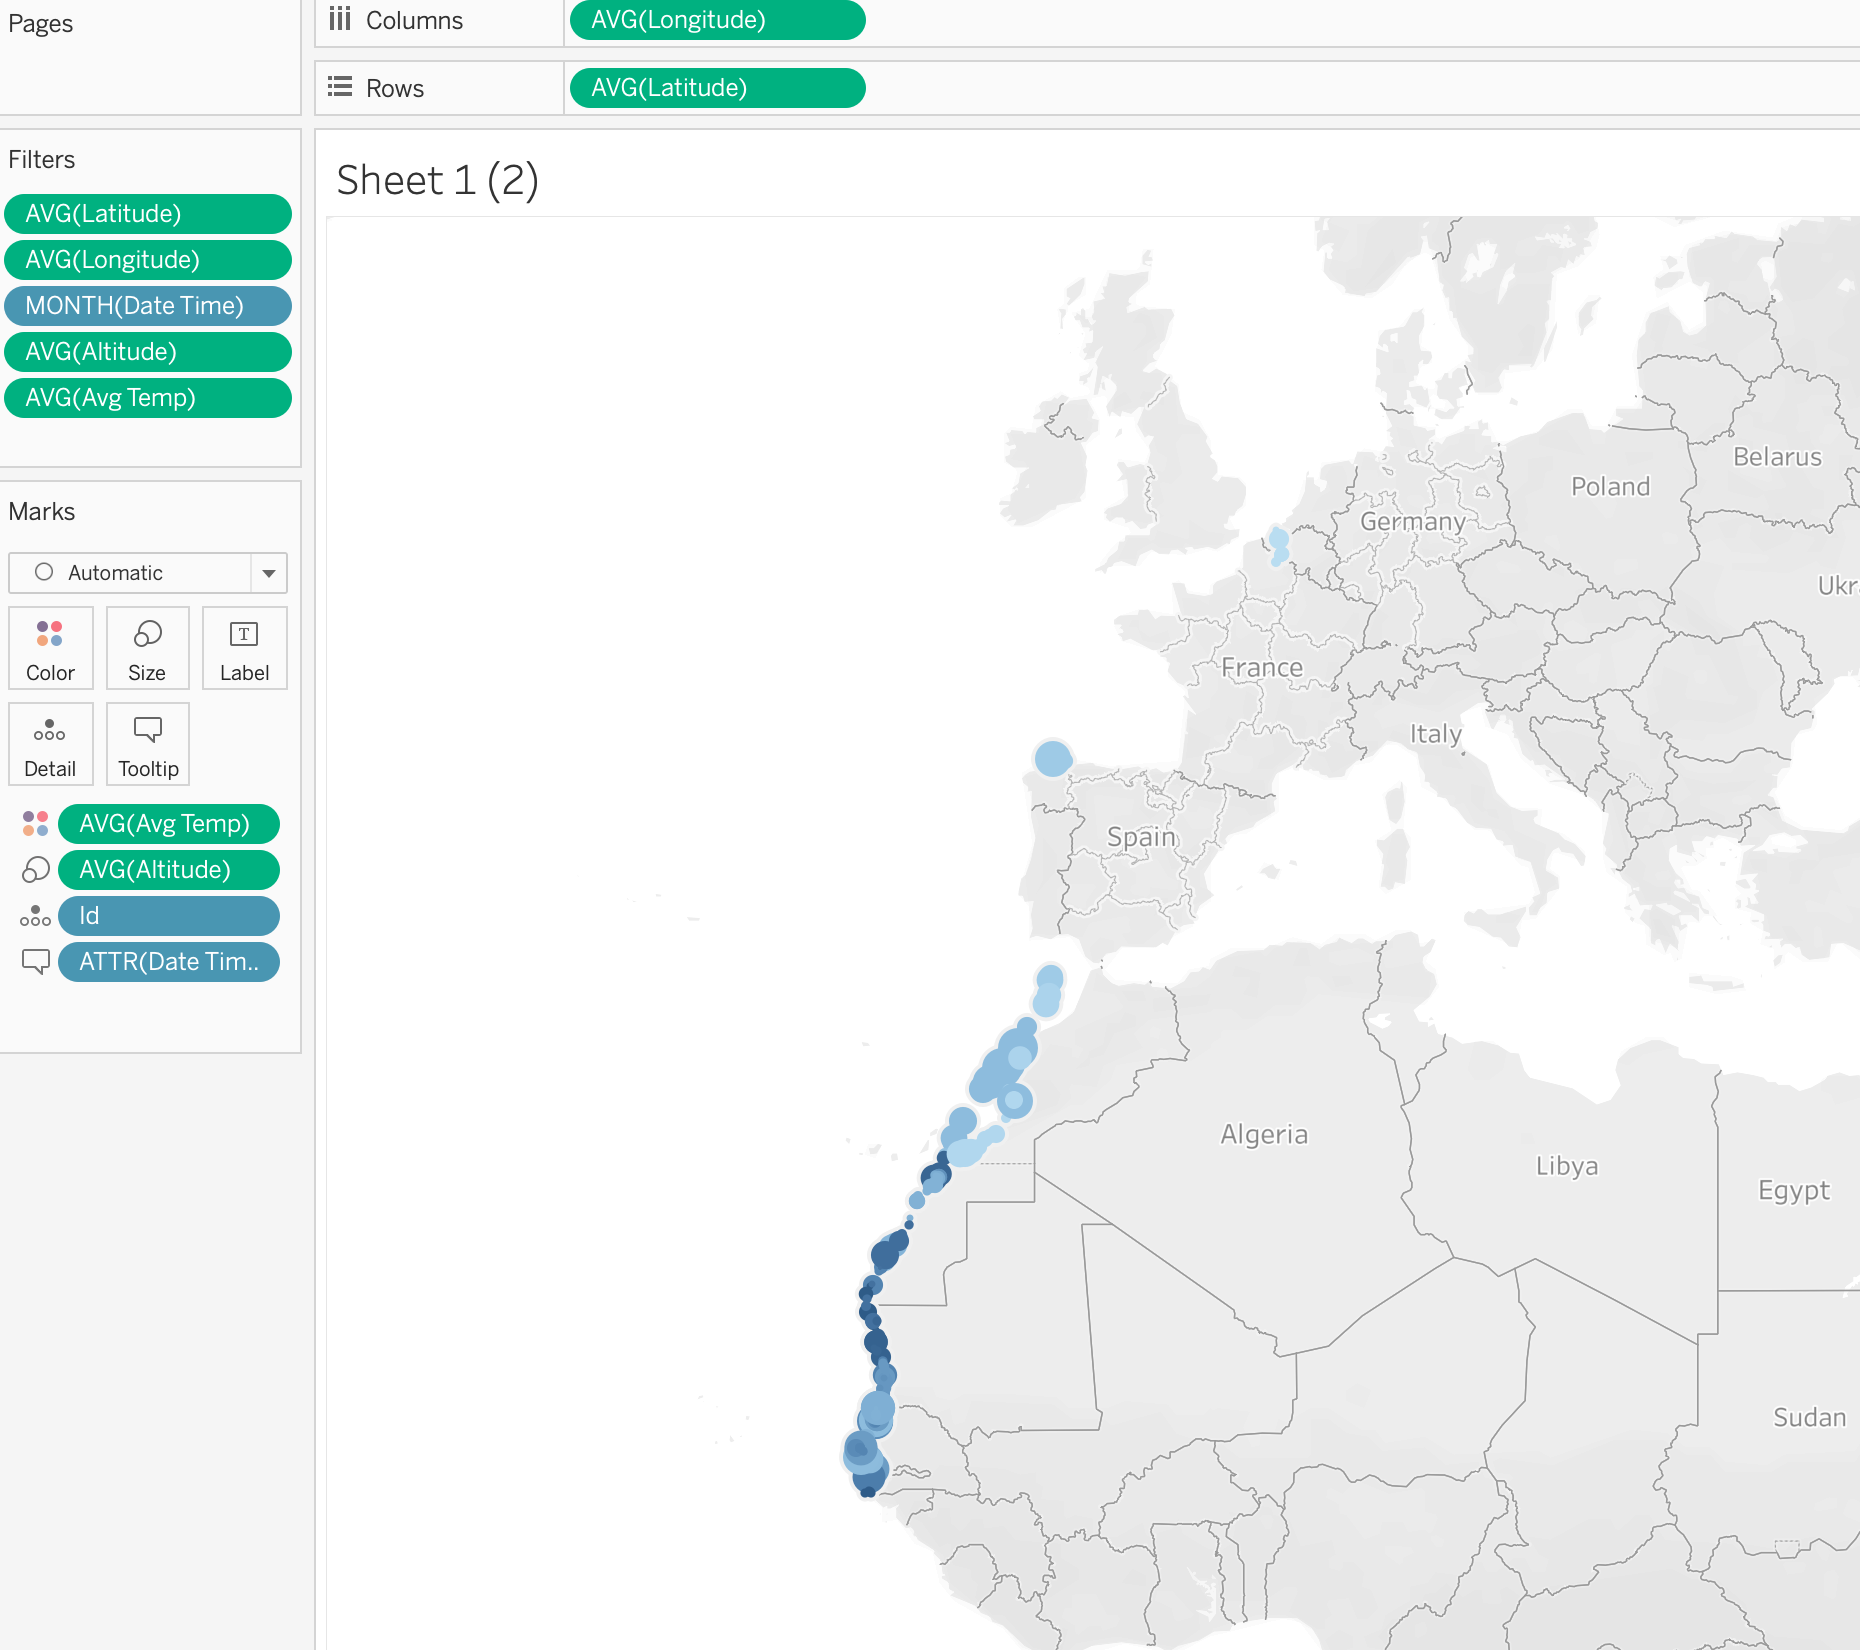

#**The Loner profile**


* Prefers the early morning (1am to 4am)
* Likes cool weather (50 degrees or below)
* Looking for higher-altitude bird flights (100ft or higher)



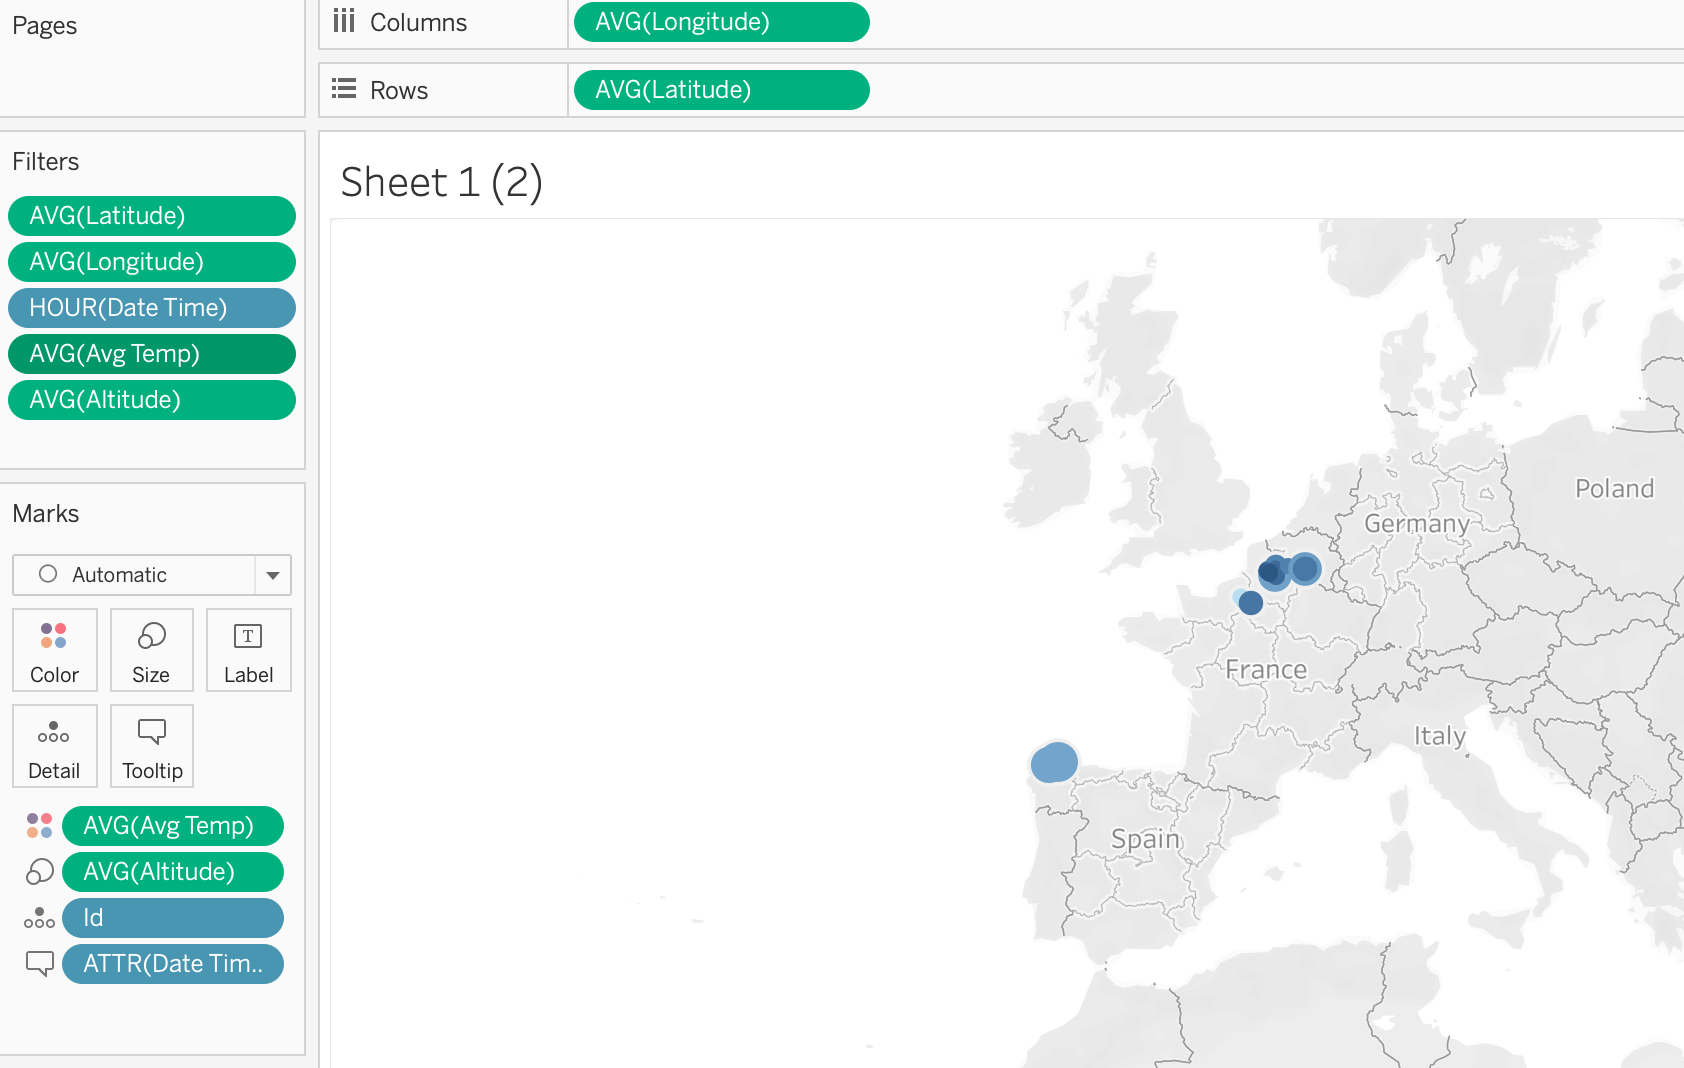